In [20]:
#install all the dependencies
import pandas as pd
import numpy as np
from sklearn import metrics #used to check accuracy
%matplotlib inline
import matplotlib.pyplot as plt


In [21]:
df=pd.read_csv('Google_Stock_Price_Test.csv')

In [22]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [23]:
#remove punctuation from volume coloumn
df['Volume']=df['Volume'].str.replace('[^\w\s]','')

In [24]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300
1,1/4/2017,788.36,791.34,783.16,786.90,1073000
2,1/5/2017,786.08,794.48,785.02,794.02,1335200
3,1/6/2017,795.26,807.90,792.20,806.15,1640200
4,1/9/2017,806.40,809.97,802.83,806.65,1272400


In [25]:
#change dateformat to yyyy-mm-dd
df['Date']=pd.to_datetime(df.Date)

In [26]:
#calculating total no. of col and entries
df.shape

(20, 6)

In [27]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,1657300
1,2017-01-04,788.36,791.34,783.16,786.90,1073000
2,2017-01-05,786.08,794.48,785.02,794.02,1335200
3,2017-01-06,795.26,807.90,792.20,806.15,1640200
4,2017-01-09,806.40,809.97,802.83,806.65,1272400


In [28]:
#returns integer values if any null values is there

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [29]:
#return bool values
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [30]:
#entire info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ KB


In [31]:
df.describe()
#used to calculate min,max,standard deviation etc

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [32]:
#no of days
print(len(df))

20


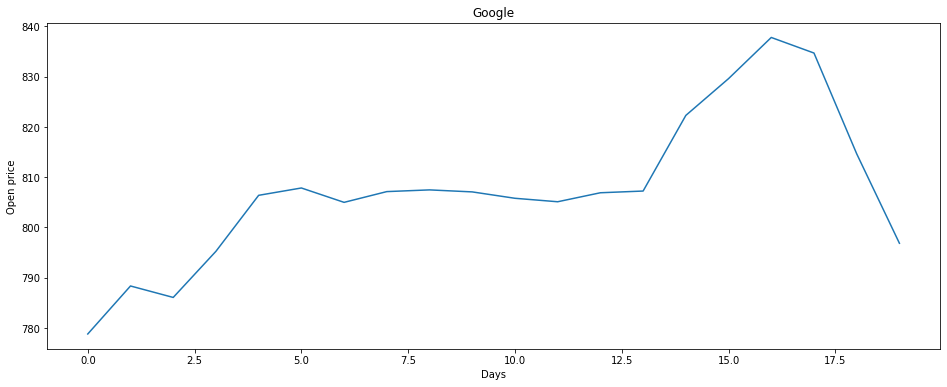

In [33]:
plt.figure(figsize=(16,6))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Open price')
plt.plot(df['Open'])
plt.show()
#only for open col

In [34]:
X=df[['Open','High','Low','Volume']]
y=df['Close']

In [35]:
!pip install sklearn

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

In [38]:
X_train.shape
#out of 20 15 are training data

(15, 4)

In [39]:
X_test.shape
#5 are testing data

(5, 4)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score

#lr is the object for LinearRegression

In [41]:
lr=LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(lr.coef_)

[-1.14022149e+00  5.80188600e-01  1.58269888e+00  2.28000663e-06]


In [44]:
print(lr.intercept_)

-15.175178812791046


In [45]:
pred=lr.predict(X_test)

In [46]:
print(X_test)

      Open    High     Low   Volume
18  814.66  815.84  799.80  3246600
1   788.36  791.34  783.16  1073000
19  796.86  801.25  790.52  2160600
8   807.48  811.22  806.69  1099200
10  805.81  806.21  800.99  1294400


In [47]:
pred.shape

(5,)

In [48]:
#create another dataframe storing y_test and predicted)

dp=pd.DataFrame(y_test,pred)

In [49]:
dfr=pd.DataFrame({'Actual price':y_test,'Predicted price':pred})

In [50]:
print(dfr)

    Actual price  Predicted price
18        802.32       802.517879
1         786.90       786.999151
19        796.79       797.185337
8         807.88       814.032907
10        806.07       804.454005


In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [52]:
lr.score(X_test,y_test)

0.8578968046521159

In [53]:
import math

In [54]:
print('mean absolute error:',metrics.mean_absolute_error(y_test,pred))

mean absolute error: 1.6922535909048748


In [55]:
print('mean squared error:',metrics.mean_squared_error(y_test,pred))

mean squared error: 8.134995265987119


In [56]:
print('root mean squared error"',math.sqrt(metrics.mean_squared_error(y_test,pred)))

root mean squared error" 2.852191309499964


In [57]:
#graphical representation

graph=dfr

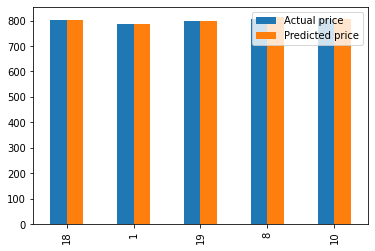

In [58]:
graph.plot(kind='bar')